In [1]:
import os
os.environ['GRB_LICENSE_FILE'] = 'content/licenses/gurobi.lic'


In [2]:
from cobra.io import read_sbml_model, write_sbml_model
from dnngior.gapfill_class import Gapfill
from dnngior.NN_Predictor import NN
import pandas as pd
import numpy as np

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2635551
Academic license 2635551 - for non-commercial use only - registered to so___@gmail.com


In [4]:
path_to_draft_model = "Draft_models/MAG001.sbml"
draft_model = read_sbml_model(path_to_draft_model)
draft_model.summary()

In [5]:
gapfill_complete_medium = Gapfill(draftModel = path_to_draft_model)

No objective coefficients in model. Unclear what should be optimized


#reactions not found in keys:  100 / 955
>> reaction:  rxn00001_c0
>> reaction:  rxn00002_c0
>> reaction:  rxn00003_c0
>> reaction:  rxn00004_c0
>> reaction:  rxn00004_c0_rv
>> reaction:  rxn00006_c0
>> reaction:  rxn00007_c0
>> reaction:  rxn00008_c0
>> reaction:  rxn00008_c0_rv
>> reaction:  rxn00009_c0
>> reaction:  rxn00010_c0
>> reaction:  rxn00011_c0
>> reaction:  rxn00012_c0
>> reaction:  rxn00012_c0_rv
>> reaction:  rxn00013_c0
>> reaction:  rxn00013_c0_rv
>> reaction:  rxn00014_c0
>> reaction:  rxn00015_c0
>> reaction:  rxn00015_c0_rv
>> reaction:  rxn00016_c0
>> reaction:  rxn00017_c0
>> reaction:  rxn00018_c0
>> reaction:  rxn00019_c0
>> reaction:  rxn00019_c0_rv
>> reaction:  rxn00020_c0
>> reaction:  rxn00021_c0
>> reaction:  rxn00021_c0_rv
>> reaction:  rxn00022_c0
>> reaction:  rxn00023_c0
>> reaction:  rxn00023_c0_rv
>> reaction:  rxn00024_c0
>> reaction:  rxn00025_c0
>> reaction:  rxn00026_c0
>> reaction:  rxn00027_c0
>> reaction:  rxn00028_c0
>> reaction:  rxn00029_c0

In [7]:
# gapfilled 后的模型
gf_model = gapfill_complete_medium.gapfilledModel

print("1. draft 模型的反应数量: ", len(gapfill_complete_medium.draft_reaction_ids))
print("2. gapfilling 补充的反应数量: ", len(gapfill_complete_medium.added_reactions))
print("3. gapfill 后完整模型的反应数量: ", len(gf_model.reactions))

# 检查优化结果
solution = gf_model.optimize()
print("4. gapfilled 模型 biomass 产量: ", solution.objective_value)


1. draft 模型的反应数量:  955
2. gapfilling 补充的反应数量:  65
3. gapfill 后完整模型的反应数量:  1020
4. gapfilled 模型 biomass 产量:  38.5259662068404


In [ ]:
write_sbml_model(gf_model, 'gapfilled_Bifidobacterium adolescentis_atcc_15703.sbml')

#reactions not found in keys:  100 / 955


<Axes: title={'center': 'Neural Network Predictions'}, ylabel='Frequency'>

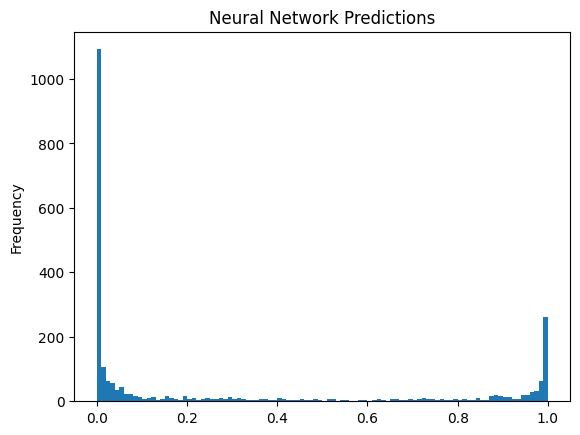

In [9]:
from dnngior.variables import TRAINED_NN_MSEED
NN_MSEED = NN(path=TRAINED_NN_MSEED)
prediction = NN_MSEED.predict(draft_model)
pd.Series(prediction).plot.hist(bins=100, title='Neural Network Predictions')

No objective coefficients in model. Unclear what should be optimized


#reactions not found in keys:  100 / 955
>> reaction:  rxn00001_c0
>> reaction:  rxn00002_c0
>> reaction:  rxn00003_c0
>> reaction:  rxn00004_c0
>> reaction:  rxn00004_c0_rv
>> reaction:  rxn00006_c0
>> reaction:  rxn00007_c0
>> reaction:  rxn00008_c0
>> reaction:  rxn00008_c0_rv
>> reaction:  rxn00009_c0
>> reaction:  rxn00010_c0
>> reaction:  rxn00011_c0
>> reaction:  rxn00012_c0
>> reaction:  rxn00012_c0_rv
>> reaction:  rxn00013_c0
>> reaction:  rxn00013_c0_rv
>> reaction:  rxn00014_c0
>> reaction:  rxn00015_c0
>> reaction:  rxn00015_c0_rv
>> reaction:  rxn00016_c0
>> reaction:  rxn00017_c0
>> reaction:  rxn00018_c0
>> reaction:  rxn00019_c0
>> reaction:  rxn00019_c0_rv
>> reaction:  rxn00020_c0
>> reaction:  rxn00021_c0
>> reaction:  rxn00021_c0_rv
>> reaction:  rxn00022_c0
>> reaction:  rxn00023_c0
>> reaction:  rxn00023_c0_rv
>> reaction:  rxn00024_c0
>> reaction:  rxn00025_c0
>> reaction:  rxn00026_c0
>> reaction:  rxn00027_c0
>> reaction:  rxn00028_c0
>> reaction:  rxn00029_c0

<Axes: ylabel='Frequency'>

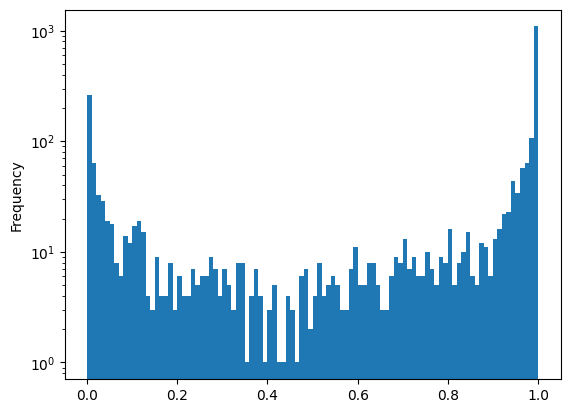

In [17]:
from dnngior.gapfill_class import Gapfill

# 初始化
gapfill_higher_def_cost = Gapfill(draftModel=path_to_draft_model, objectiveName='bio1')

# gapfill 带 default_cost=10
model_gapfilled = gapfill_higher_def_cost.gapfill(
    all_reactions=gapfill_higher_def_cost.all_reactions,
    draft_reaction_ids=gapfill_higher_def_cost.draft_reaction_ids,
    candidate_reactions=gapfill_higher_def_cost.weights,
    obj_id='bio1',
    result_selection='min_reactions',
    default_cost=10
)

<Axes: ylabel='Frequency'>

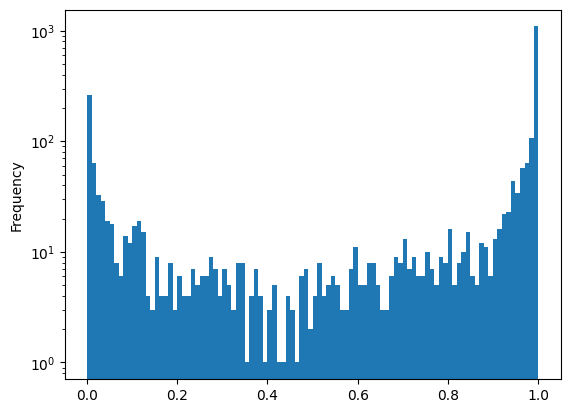

In [18]:
# 绘图
pd.Series(gapfill_higher_def_cost.weights).plot.hist(bins=100, label='Higher default cost', logy=True)

CLI:
python DNNGIOR/dnngior/fasta2model_CLI.py -m /Users/azddza/gsmmWorkshop/Draft_models/ -o /Users/azddza/gsmmWorkshop/Gapfilled_models/ -sm .sbml
